In [1]:
import pandas
mulpP_EIRA = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['Multiplicative_interaction_term_pvalue'], squeeze=True)

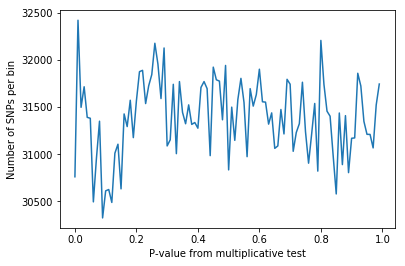

In [3]:
multP_EIRA = mulpP_EIRA
import pylab, dr_tools
xarr, yarr = dr_tools.bin(multP_EIRA, 0, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.xlabel('P-value from multiplicative test')
pylab.ylabel('Number of SNPs per bin')
pylab.show()

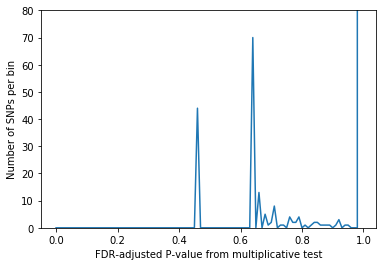

In [8]:
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(multP_EIRA), 0, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.xlabel('FDR-adjusted P-value from multiplicative test')
pylab.ylabel('Number of SNPs per bin')
pylab.ylim(0, 80)
pylab.show()

In [10]:
(multP_EIRA<0.05).mean()

0.050268707841668654

In [3]:
multP_NARAC = pandas.read_csv('NARAC.allresults.bp.txt.gz', sep='\t', usecols=['Multiplicative_interaction_term_pvalue'], squeeze=True)

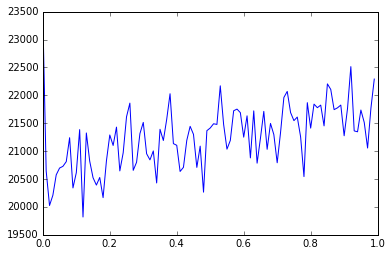

In [4]:
xarr, yarr = dr_tools.bin(multP_NARAC, 0, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.show()

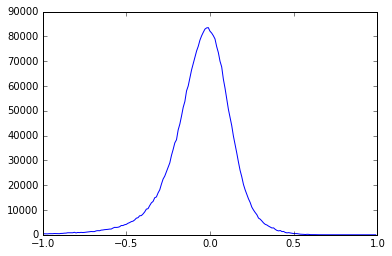

In [5]:
import pandas, dr_tools, pylab
AP_EIRA = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['AP'], squeeze=True)
xarr, yarr = dr_tools.bin(AP_EIRA, -1, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.show()

In [6]:
import numpy
print(numpy.median([AP for AP in AP_EIRA if AP > 0.001]))
print(numpy.median([AP for AP in AP_EIRA if AP < -0.001]))

0.086895289176
-0.122273518237


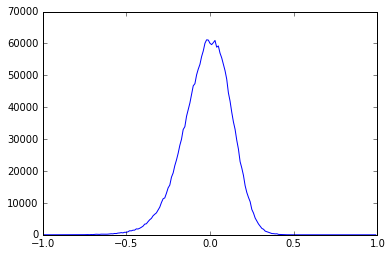

In [7]:
AP_NARAC = pandas.read_csv('NARAC.allresults.bp.txt.gz', sep='\t', usecols=['AP'], squeeze=True)
xarr, yarr = dr_tools.bin(AP_NARAC, -1, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.show()

In [8]:
dfP_EIRA = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['AP_pvalue', 'Multiplicative_interaction_term_pvalue'])

In [9]:
from scipy import stats
stats.spearmanr(dfP_EIRA['AP_pvalue'], dfP_EIRA['Multiplicative_interaction_term_pvalue'])

SpearmanrResult(correlation=0.35372332968670794, pvalue=0.0)

In [11]:
dfP_EIRA.head()

,AP_pvalue,Multiplicative_interaction_term_pvalue
0,0.111559,0.246749
1,0.386143,0.426306
2,0.381789,0.438991
3,0.373639,0.006671
4,0.958531,0.107477


In [13]:
min(dr_tools.globalFDR(dfP_EIRA['Multiplicative_interaction_term_pvalue']))

0.46776011016548508

In [2]:
import pandas, pylab
dfP_EIRA = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['AP_pvalue', 'Multiplicative_interaction_term_pvalue', 'ORa_test_marker', 'ORm_testmarker'])

In [3]:
from scipy import stats
stats.spearmanr(dfP_EIRA['ORa_test_marker'], dfP_EIRA['ORm_testmarker'])

SpearmanrResult(correlation=0.4067513486695213, pvalue=0.0)

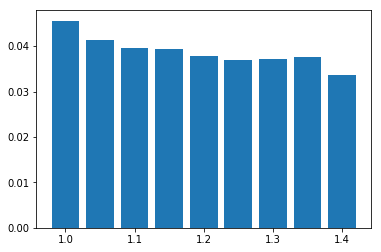

In [10]:
from collections import defaultdict
import itertools
def plot_by_OR_and_P(ORcol, Pcol):
    P_per_ORbin = dict()
    bin_min_arr = pylab.arange(1, 1.41, 0.05)
    for bin_min, bin_max in itertools.zip_longest(bin_min_arr, bin_min_arr[1:], fillvalue=pylab.inf):
        P_per_ORbin[bin_min] = (dfP_EIRA[(bin_min <= dfP_EIRA[ORcol])&(dfP_EIRA[ORcol] < bin_max)][Pcol]<=0.05).mean()
    pylab.bar(P_per_ORbin.keys(), P_per_ORbin.values(), width=0.04)
    pylab.show()
plot_by_OR_and_P('ORa_test_marker', 'AP_pvalue')

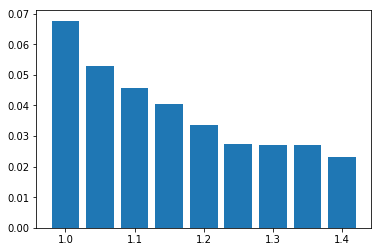

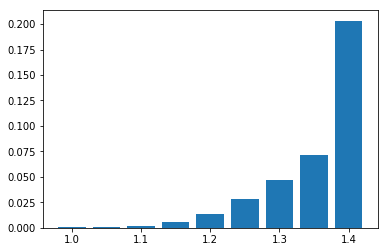

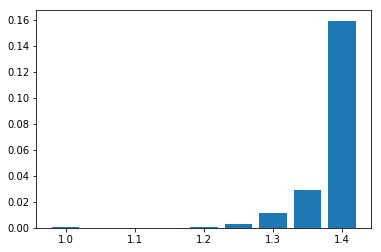

In [11]:
plot_by_OR_and_P('ORm_testmarker', 'AP_pvalue')
plot_by_OR_and_P('ORa_test_marker', 'Multiplicative_interaction_term_pvalue')
plot_by_OR_and_P('ORm_testmarker', 'Multiplicative_interaction_term_pvalue')

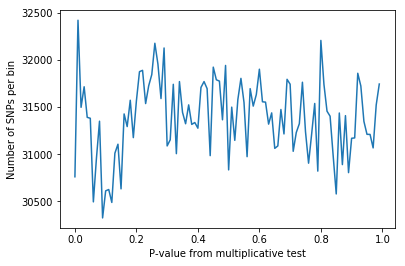

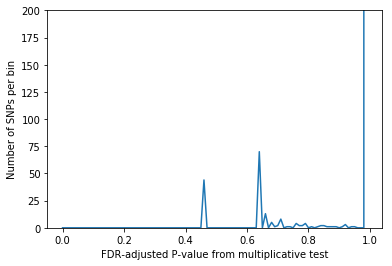

In [12]:
import pandas
multP_EIRA = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['Multiplicative_interaction_term_pvalue'], squeeze=True)
import pylab, dr_tools
xarr, yarr = dr_tools.bin(multP_EIRA, 0, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.xlabel('P-value from multiplicative test')
pylab.ylabel('Number of SNPs per bin')
pylab.savefig('SE-multP-distr.pdf')
pylab.show()
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(multP_EIRA), 0, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.xlabel('FDR-adjusted P-value from multiplicative test')
pylab.ylabel('Number of SNPs per bin')
pylab.ylim(0, 200)
pylab.savefig('SE-multPadj-distr.pdf')
pylab.show()

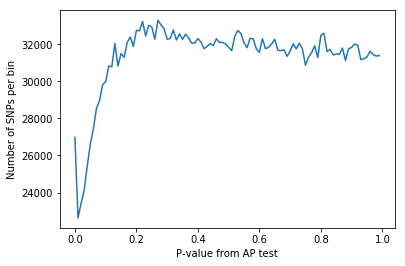

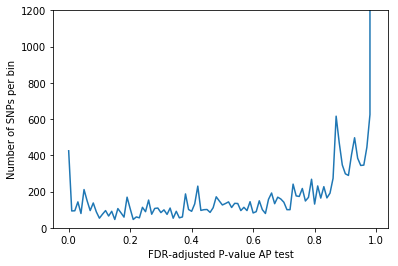

In [13]:
import pandas
addP_EIRA = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['AP_pvalue'], squeeze=True)
import pylab, dr_tools
xarr, yarr = dr_tools.bin(addP_EIRA, 0, 1, 0.01)
pylab.plot(xarr, yarr)
pylab.xlabel('P-value from AP test')
pylab.ylabel('Number of SNPs per bin')
pylab.savefig('SE-APP-distr.pdf')
pylab.show()



In [18]:
multP_EIRA_PTPN22 = pandas.read_csv('/Users/darams/HLA-interaction-measures/PTPN22/PTPN22-interaction-geisa-results.txt', sep='\t', usecols=['Multiplicative_interaction_term_pvalue'], squeeze=True)
addP_EIRA_PTPN22 = pandas.read_csv('/Users/darams/HLA-interaction-measures/PTPN22/PTPN22-interaction-geisa-results.txt', sep='\t', usecols=['AP_pvalue'], squeeze=True)




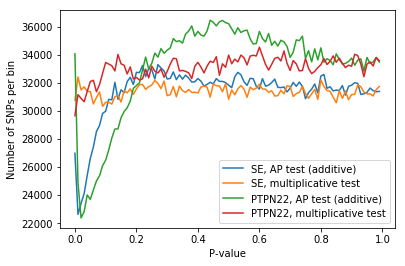

In [26]:
xarr, yarr = dr_tools.bin(addP_EIRA, 0, 1, 0.01)
pylab.plot(xarr, yarr, label='SE, AP test (additive)')
xarr, yarr = dr_tools.bin(multP_EIRA, 0, 1, 0.01)
pylab.plot(xarr, yarr, label='SE, multiplicative test')
xarr, yarr = dr_tools.bin(addP_EIRA_PTPN22, 0, 1, 0.01)
pylab.plot(xarr, yarr, label='PTPN22, AP test (additive)')
xarr, yarr = dr_tools.bin(multP_EIRA_PTPN22, 0, 1, 0.01)
pylab.plot(xarr, yarr, label='PTPN22, multiplicative test')
pylab.xlabel('P-value')
pylab.ylabel('Number of SNPs per bin')
pylab.legend()
pylab.savefig('SE-and-PTPN22-Pval-eira.pdf')
pylab.show()

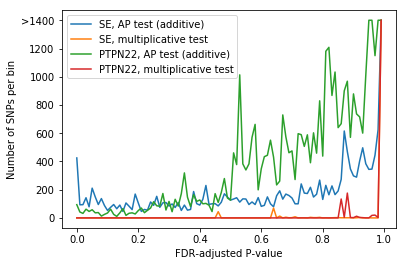

In [25]:
maxy = 1401
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(addP_EIRA), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='SE, AP test (additive)')
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(multP_EIRA), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='SE, multiplicative test')
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(addP_EIRA_PTPN22), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='PTPN22, AP test (additive)')
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(multP_EIRA_PTPN22), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='PTPN22, multiplicative test')
pylab.xlabel('FDR-adjusted P-value')
pylab.ylabel('Number of SNPs per bin')
pylab.yticks([0, 200, 400, 600, 800, 1000, 1200, maxy], ['0', '200', '400', '600', '800', '1000', '1200', '>1400'])
pylab.legend()
pylab.savefig('SE-and-PTPN22-Padj-eira.pdf')
pylab.show()

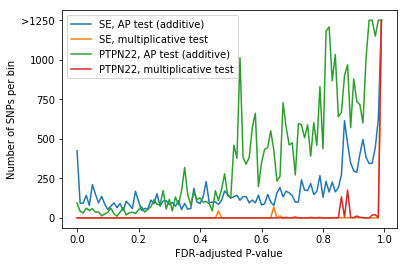

In [28]:
maxy = 1251
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(addP_EIRA), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='SE, AP test (additive)')
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(multP_EIRA), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='SE, multiplicative test')
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(addP_EIRA_PTPN22), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='PTPN22, AP test (additive)')
xarr, yarr = dr_tools.bin(dr_tools.globalFDR(multP_EIRA_PTPN22), 0, 1, 0.01)
yarr = [min(y, maxy) for y in yarr]
pylab.plot(xarr, yarr, label='PTPN22, multiplicative test')
pylab.xlabel('FDR-adjusted P-value')
pylab.ylabel('Number of SNPs per bin')
pylab.yticks([0, 250, 500, 750, 1000, maxy], ['0', '250', '500', '750', '1000', '>1250'])
pylab.legend()
pylab.savefig('SE-and-PTPN22-Padj-eira-1250.pdf')
pylab.show()

In [2]:
import pandas
metrics_EIRA_PTPN22 = pandas.read_csv('/Users/darams/HLA-interaction-measures/PTPN22/PTPN22-interaction-geisa-results.txt', sep='\t', usecols=['ORm_interaction', 'AP'])
metrics_EIRA_SE = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=['ORm_interaction', 'AP', 'ORa_double_exposure'])




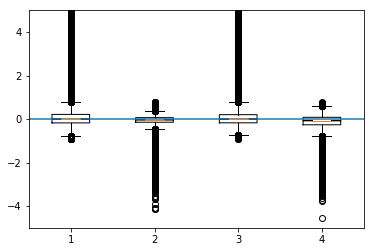

In [11]:
import pylab
pylab.boxplot([metrics_EIRA_SE['ORm_interaction']-1, metrics_EIRA_SE['AP'], metrics_EIRA_PTPN22['ORm_interaction']-1, metrics_EIRA_PTPN22['AP']], notch=True)
pylab.gca().axhline(0)
pylab.ylim(-5, 5)
pylab.show()
# why do the AP values look inverted? (minus as plus and vice versa)

In [12]:
num_cols = ['No_controls_test_0_risk_0', 'No_cases_test_0_risk_0', 'No_cases_test_1_risk_0', 'No_controls_test_1_risk_0', 'No_cases_test_0_risk_1', 'No_controls_test_0_risk_1', 'No_cases_test_1_risk_1', 'No_controls_test_1_risk_1']
nums_EIRA_PTPN22 = pandas.read_csv('/Users/darams/HLA-interaction-measures/PTPN22/PTPN22-interaction-geisa-results.txt', sep='\t', usecols=num_cols)



In [22]:
def obsexpratios(row):
    ABoutcomeTetrads_sums = [row['No_%s_test_%i_risk_%i'%(outcome, A, B)] for outcome in ('controls', 'cases') for A, B in ([1,1], [1,0], [0,1], [0,0])]
    print(ABoutcomeTetrads_sums)
    ratio_tetrad = [vYes/vNo for vNo, vYes in zip(ABoutcomeTetrads_sums[:4], ABoutcomeTetrads_sums[4:])]
    print(ratio_tetrad)
    ratio_tetrad = [v/ratio_tetrad[-1] for v in ratio_tetrad]
    expected_AB_mult = ratio_tetrad[1]*ratio_tetrad[2]
    expected_AB_add = ratio_tetrad[1]+ratio_tetrad[2]-1
    observed = ratio_tetrad[0]
    return observed/expected_AB_mult, observed/expected_AB_add, observed
multratio, addratio, obs = obsexpratios(nums_EIRA_PTPN22)

[0          770
1          798
2          805
3          807
4          183
5          110
6          118
7          103
8          106
9           61
10          59
11          59
12          56
13          54
14          54
15         199
16         102
17         183
18         205
19         205
20         219
21         157
22         147
23          52
24          53
25          54
26          50
27           8
28          50
29          50
          ... 
3308754     21
3308755    226
3308756    225
3308757    201
3308758    224
3308759    221
3308760    212
3308761    214
3308762     22
3308763    210
3308764    193
3308765      8
3308766      7
3308767    192
3308768    221
3308769    175
3308770    201
3308771    196
3308772     25
3308773    131
3308774    154
3308775    202
3308776    190
3308777    226
3308778    142
3308779     23
3308780    187
3308781    174
3308782    211
3308783    178
Name: No_controls_test_1_risk_1, Length: 3308784, dtype: int64, 0          208
1    

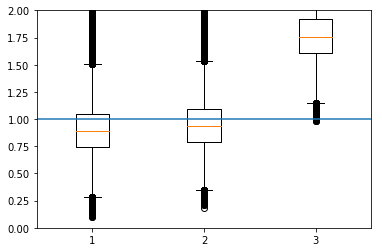

In [23]:
pylab.boxplot([multratio, addratio, obs])
pylab.gca().axhline(1)
pylab.ylim(0, 2)
pylab.show()

In [24]:
nums_EIRA_SE = pandas.read_csv('EIRA.allresults.bp.txt.gz', sep='\t', usecols=num_cols)



[0          504
1           70
2           70
3           29
4           21
5          499
6          107
7          411
8          423
9          406
10         438
11         214
12         292
13         396
14         458
15         476
16         417
17         353
18          79
19          26
20         333
21         513
22          69
23         213
24         486
25         407
26         430
27         182
28          89
29         344
          ... 
3138881     61
3138882    359
3138883     22
3138884    219
3138885    316
3138886    229
3138887     88
3138888    107
3138889    218
3138890    236
3138891    417
3138892    291
3138893    463
3138894    399
3138895     28
3138896    459
3138897    172
3138898    341
3138899     94
3138900    397
3138901    437
3138902      9
3138903    471
3138904    470
3138905    489
3138906     50
3138907     84
3138908    272
3138909    506
3138910    424
Name: No_controls_test_1_risk_1, Length: 3138911, dtype: int64, 0          494
1    

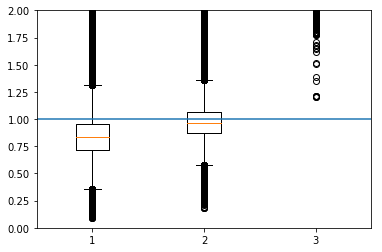

In [25]:
multratio, addratio, obs = obsexpratios(nums_EIRA_SE)
pylab.boxplot([multratio, addratio, obs])
pylab.gca().axhline(1)
pylab.ylim(0, 2)
pylab.show()